In [44]:
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

Id: a unique identifier for each row. Each row is recorded whenever an ad is rendered on a user's device.

CampaignId: A campaign is an ad placement session for a single client and single product. The campaignId is used to distinguish different campaigns. 
Within a single campaign, there could be multiple strategies who are served under what is called an adgroup, identified by the next column.

Adformat: the size of the creative expressed as width and height.

FoldPosition:the declared position of the ad in the view space of the user’s device. Possible values are 1 (any), 2 (above), 3 (below), 4 (unknown).

DeviceType: the numeric ID for the type of device on which the impression was served. For supported values, see Device Types.

OS: The numeric ID for the operating system (OS) associated with the impression event. For supported values, see Operating Systems. 

Site: The address of the website where the impression was purchased and the creative was displayed. This is the column you are supposed to give a score to and rank in task one.

engagement: a binary value that indicates if the user interacted with the ad or not.


In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Copy of impression_log.csv")

In [6]:
df.head()

,Unnamed: 0,LogEntryTime,AdvertiserId,CampaignId,AdGroupId,AudienceID,CreativeId,AdFormat,Frequency,Site,FoldPosition,Country,Region,City,DeviceType,OSFamily,OS,Browser,DeviceMake,AdvertiserCurrency,click,engagement,video-end,video-start
0,00006a06-14e2-47d9-b999-fbeeac67dd2b,2021-09-25 00:22:37,868ko1s,t29si1w,e9qf2dm,0,9wkrkl5j,300x250,0,scrabblewordfinder.org,4,United States,New York,Staten Island,4,5.0,173.0,7.0,Apple,0.006409,0,0,0,0
1,00007898-29c9-43f1-82e5-43c5a856d0f4,2021-09-25 02:31:35,868ko1s,fiwemi8,8m750eh,0,zhre4utp,300x250,0,www.thecoli.com,2,United States,Massachusetts,Milton,4,5.0,173.0,7.0,Apple,0.002778,0,0,0,0
2,0000d06f-5239-4123-af41-bd1c0e0e8d48,2021-09-25 20:12:52,868ko1s,awbu4q4,oropida,lnqjhqm,ab6spdyi,300x250,0,www.today.com,3,United States,New York,Brooklyn,4,6.0,156.0,6.0,Samsung,0.008947,0,0,0,0
3,0000d623-aaf1-4be8-81f7-eb6c96b30aee,2021-09-22 16:04:12,868ko1s,t29si1w,e9qf2dm,0,2spj6krt,300x250,0,www.cbssports.com,4,United States,New York,Queens,4,5.0,101.0,7.0,Apple,0.007673,0,0,0,0
4,0000e836-9778-4ea9-b686-9e7bf26f90bd,2021-09-22 14:33:59,868ko1s,awbu4q4,oropida,lnqjhqm,ql1q5nq9,300x250,0,backroadramblers.com,3,United States,New York,The Bronx,4,5.0,101.0,7.0,Apple,0.008852,0,1,1,1


In [7]:
df.nunique()

Unnamed: 0            99986
LogEntryTime          89751
AdvertiserId              1
CampaignId               13
AdGroupId                25
AudienceID                6
CreativeId              282
AdFormat                  2
Frequency                 1
Site                   8538
FoldPosition              3
Country                   1
Region                   11
City                   1295
DeviceType                3
OSFamily                  6
OS                       49
Browser                   8
DeviceMake              130
AdvertiserCurrency    55156
click                     2
engagement                2
video-end                 2
video-start               2
dtype: int64

Task 1
Write a function that scores each site in each campaign, assigns a score to each site in each campaign and rank them accordingly. The scoring should be done in such a way that a higher score promises having high engagement rates for ads rendered on that site in the future


### Calculate the engagement rate for each site in each campaign
- You can calculate engagement rate for a site by dividing the number of engagements (number of rows having that site and the value “1” in the engagement column) by the number of impressions ( total number of rows having that site ) .

In [8]:

engagement = df.groupby(["CampaignId","Site"]).apply(lambda row: row["engagement"].sum())
campaign_ids = [key[0] for key in engagement.keys()]
sites = [key[1] for key in engagement.keys()]
engagement_count_df = pd.DataFrame({"engagement_count":engagement,"Campaign_id":campaign_ids,"site":sites})
# The number of rows having the sites
row_count_sites = df.groupby(["Site"]).count()["CampaignId"]
total_number_rows= pd.DataFrame({"Count_site_apperances":row_count_sites,"site":row_count_sites.keys()})

engagement_rate_df = engagement_count_df.merge(total_number_rows, left_on='site', right_on='site')
engagement_rate_df["engagement_rate"] = engagement_rate_df.apply(lambda row: row["engagement_count"]/row["Count_site_apperances"],axis=1)
engagement_rate_df


,engagement_count,Campaign_id,site,Count_site_apperances,engagement_rate
0,0,0k2sw7w,247sports.com,632,0.000000
1,1,5qtwg2a,247sports.com,632,0.001582
2,73,758ifo0,247sports.com,632,0.115506
3,2,8muucqy,247sports.com,632,0.003165
4,2,9n6o7jf,247sports.com,632,0.003165
...,...,...,...,...,...
19977,0,z5cjizq,www.onionringsandthings.com,1,0.000000
19978,0,z5cjizq,www.savvyhorsewoman.com,1,0.000000
19979,0,z5cjizq,www.techadvisor.com,1,0.000000
19980,0,z5cjizq,www.tidefans.com,3,0.000000


In order to give the right score we need to make sure, this data collected is a good representative for the real time and future occurences.


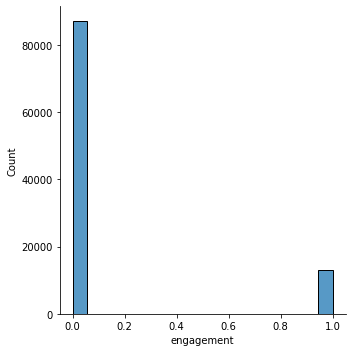

In [15]:
sn.displot(df['engagement'])

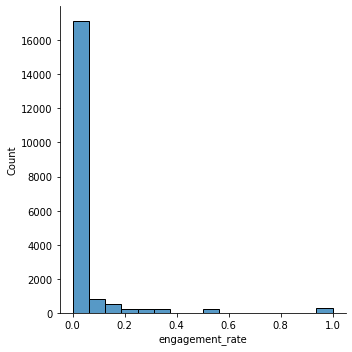

In [14]:
sn.displot(engagement_rate_df['engagement_rate'])

In [ ]:
engagement_rate_df[engagement_rate[]]

From the above plots we can see that our data might be imbalanced, there are around

In [18]:
# AdFormat, FoldPosition, OS, DeviceType) on whether a user will engage with an ad or not
df_engagement_factors = df[["AdFormat", "FoldPosition", "OS", "DeviceType","engagement"]]
df_engagement_factors.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AdFormat      100000 non-null  object 
 1   FoldPosition  100000 non-null  int64  
 2   OS            99993 non-null   float64
 3   DeviceType    100000 non-null  int64  
 4   engagement    100000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 3.8+ MB


In [ ]:
df_engagement_factors.dropna(inplace=True)

In [20]:
df_engagement_factors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99993 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AdFormat      99993 non-null  object 
 1   FoldPosition  99993 non-null  int64  
 2   OS            99993 non-null  float64
 3   DeviceType    99993 non-null  int64  
 4   engagement    99993 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.6+ MB


In [22]:
df_engagement_factors.nunique()

AdFormat         2
FoldPosition     3
OS              49
DeviceType       3
engagement       2
dtype: int64

All columns are numerical except AdFormat, we will encode it

In [28]:
df_engagement_factors['AdFormat'] = encode(df_engagement_factors['AdFormat'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AdFormat,FoldPosition,OS,DeviceType,engagement
0,0,4,173.0,4,0
1,0,2,173.0,4,0
2,0,3,156.0,4,0
3,0,4,101.0,4,0
4,0,3,101.0,4,1


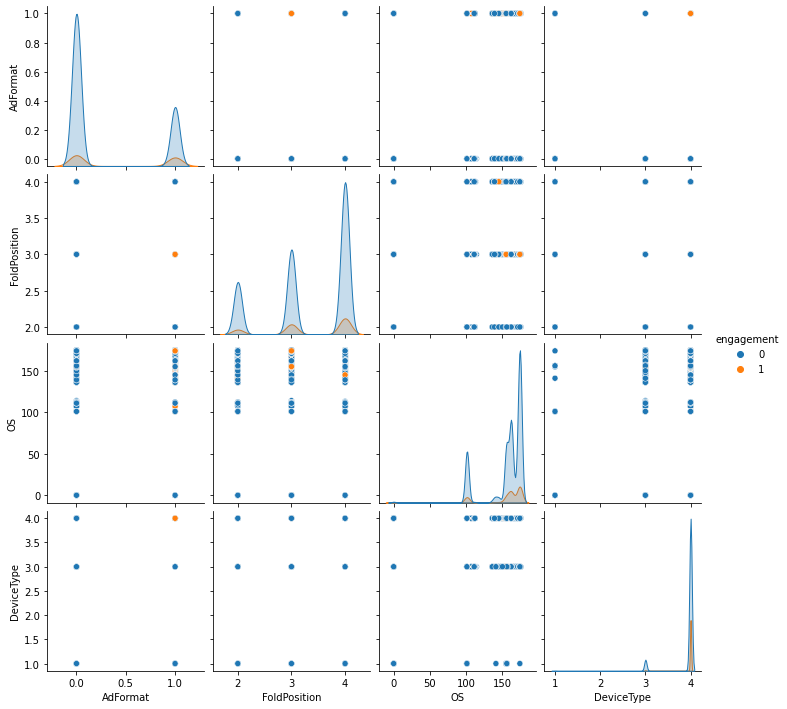

In [31]:
sn.pairplot(df_engagement_factors,vars=["AdFormat", "FoldPosition", "OS", "DeviceType"],hue="engagement")

In [85]:

def encode(categorical_data):
  """ Encode labels """
  le = LabelEncoder()
  return le.fit_transform(categorical_data)

class FeatureEngineering:
  def __init__(self,df):
    self.df = df 

  def execute_feature_engineering(self):
    """ execute feature engineering by calling
    prepare_data function and select important
    features using select_features fun"""
    self.prepare_data()
    self.select_features()

  def prepare_data(self):
    """ prepare data by calling prepare_X_y 
    and split_X_y
    """
    self.prepare_X_y()
    self.split_X_y()

  def prepare_X_y(self):
    """ Prepare X and y from a given dataframe
    by converting
    to numpy """
    y = np.array(self.df['engagement'])
    self.df_x = self.df.drop(columns=["engagement"])
    self.X = np.array(self.df_x)
    self.y = y.reshape(-1,)


  def split_X_y(self):
    """ Split X and y using sklearn train_test_split """
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
        self.X, self.y, stratify=self.y, random_state=42)

  def return_X_y(self):
    """ return X and y """
    return self.X,self.y

  def return_split_X_y(self):
    """ return X_train, X_test, y_train and y_test """
    return self.X_train, self.X_test, self.y_train, self.y_test

  def calculate_feature_importance(self):
    """ Calculate feature importance of features by fitting 
        a randomforest classifier 
    """
    feature_names = [f'feature {i}' for i in range(self.X.shape[1])]
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(self.X_train, self.y_train)
    self.importances = forest.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in forest.estimators_], axis=0)
    return self.importances, std

  def display_feature_importance(self):
    """ Display feature importance """
    feature_df = pd.DataFrame({"features":self.df_x.columns,"feature_importance": self.importances})
    g = sn.catplot(data=feature_df,y="features",x="feature_importance",kind="bar")
    return feature_df,g

  def select_features(self):
    """ select features from a random forest estimator using 
        sklearn SelectFromModel 
    """
    selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100)).fit(self.X, self.y)
    self.selected_features = self.df_x.columns[(selector.get_support())]
    return self.selected_features

  def select_features_permutuation(self):
    clf = RandomForestClassifier(n_estimators=100).fit(self.X, self.y)
    result = permutation_importance(clf, self.X_test, self.y_test, n_repeats=10,
                                random_state=0)
    return result

  def data_with_selected_features(self):
    """ select data with only the features selected"""
    data_selected = self.df[self.selected_features]
    return data_selected

In [86]:
fe = FeatureEngineering(df_engagement_factors)
fe.prepare_data()

In [55]:
importances, std = fe.calculate_feature_importance()

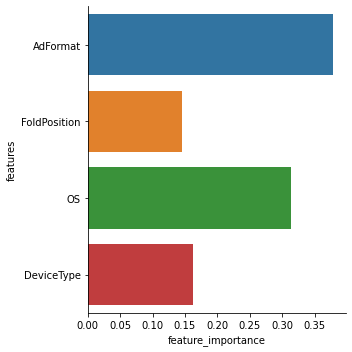

In [56]:
feature_df, _ = fe.display_feature_importance()

In [57]:
feature_df

,features,feature_importance
0,AdFormat,0.378702
1,FoldPosition,0.146132
2,OS,0.312886
3,DeviceType,0.162280


From the numbers and the graph above we can see that AdFormat has the largest importance out of all but his depends on the type of estimator we use and how well it has fit our data, In this case random forest was used as estimator. 

[Text(0.5, 0, 'AdFormat'),
 Text(1.5, 0, 'FoldPosition'),
 Text(2.5, 0, 'OS'),
 Text(3.5, 0, 'DeviceType'),
 Text(4.5, 0, 'engagement')]

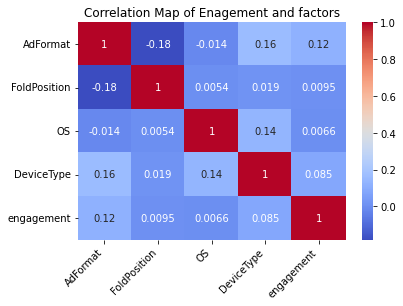

In [48]:
ax = sn.heatmap(
    df_engagement_factors.corr(), 
    annot=True, cmap="coolwarm"
)
plt.title("Correlation Map of Enagement and factors")
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right')

from the correlation map we can see the correlation between engagement and AdFormat is bigger relatively. To check we will use permutation importance

In [87]:
from sklearn.inspection import permutation_importance


In [81]:
column_names = df_engagement_factors.columns.tolist()[:4]

In [88]:
result = fe.select_features_permutuation()


In [89]:
forest_importances = pd.Series(result.importances_mean,index=column_names)

In [90]:
forest_importances

AdFormat        0.000008
FoldPosition    0.000016
OS              0.000092
DeviceType      0.000080
dtype: float64

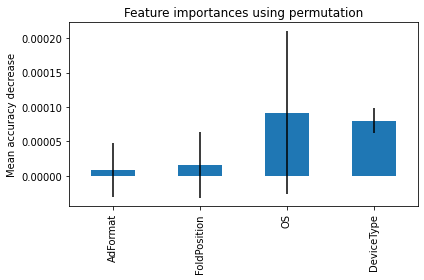

In [91]:
# graph adopted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Here we get a result that is a bit different from the previous one. Which shows OS has more feature importance. The permutation method is less biased to high cardinal data. which in this case we don't have much of.